In [36]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray} \large 
Z_{n+1} = Z_{n}^{-p_{5}*{Z_{n}^{-p_{4}^{-p_{3}*Z_{n}^{p_{2}^{Z_{n}^{-p_{1}}}}}}}}
\end{eqnarray}""")

<IPython.core.display.Latex object>

# Numerical mayhem revisited.

    Z = Z**(-p[4] * Z**(-p[3]**(-p[2]*Z**(-p[1]**(Z**(-p[0]))))))
    with
    p = [131.736080357263, 7.410291823809, 12.902639951370, 2.223646982174, 0.972974554764]

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import sys   
import numpy as np
import time

from IPython.display import display

sys.path.insert(1, '../src');
import z_plane as zp
import graphic_utility as gu;
import itergataters as ig
import numcolorpy as ncp

separable = 0.7958 + 0.1893j 
iconic = 0.7757 + 0.1234j
spirals = 0.7513 + 0.2551j
ropey = 0.81 + 0.2025j

In [25]:
def RadHak(Z, p, Z0=None, ET=None):
    """ Z = RadHak(Z, p) 
    Args:
        Z:    a real or complex number
        p:    a real of complex number
    Returns:
        Z:    the result (complex)
    """
    return Z**(-p[4] * Z**(-p[3]**(-p[2]*Z**(-p[1]**(Z**(-p[0]))))))

In [56]:
#                                        -- define parameters iterate the above equation  --  "iconic" parameter p
par_set = {'n_rows': 300, 'n_cols': 900}
par_set['center_point'] = 0.7 + 0.0*1j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 0.31

par_set['it_max'] = 64
par_set['max_d'] = 120 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [131.736080357263, 7.410291823809, 12.902639951370, 2.223646982174, 0.972974554764]

list_tuple = [(RadHak, (p))]

t0 = time.time()
ET, Z, Z0 = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd, Zr, ETn = ncp.etg_norm(Z0, Z, ET)
print('converstion time =\t', time.time() - t0)

6.1708550453186035 	 total time
converstion time =	 0.5591320991516113


coloring time:	 3.4395430088043213


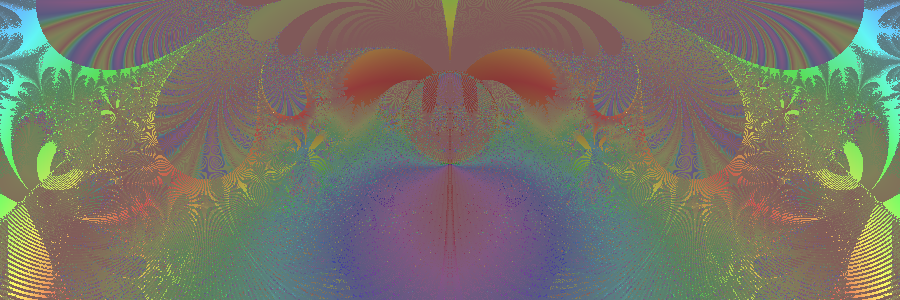

In [78]:
H = ncp.range_norm(Zd - Zr, lo=0.0, hi=1.0)
S = ncp.range_norm(ETn, lo=0.3, hi=0.6)
V = ncp.range_norm(ETn*Zd, lo=0.5, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 3.4489269256591797


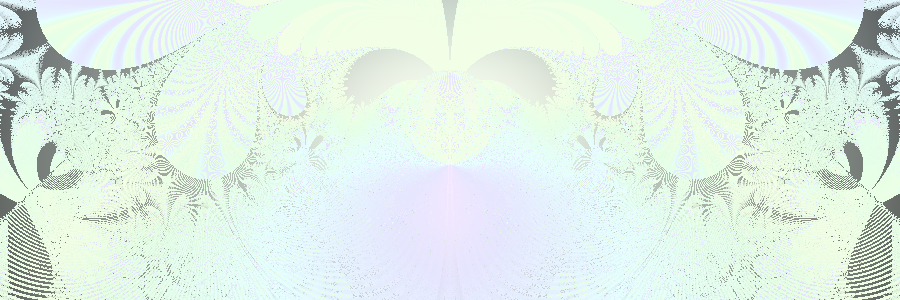

In [77]:
H = ncp.range_norm(Zr - Zd, lo=0.25, hi=0.75)
S = ncp.range_norm(1 - ETn, lo=0.05, hi=0.1)
V = ncp.range_norm(1 - ETn*Zd, lo=0.4, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

coloring time:	 3.004702091217041


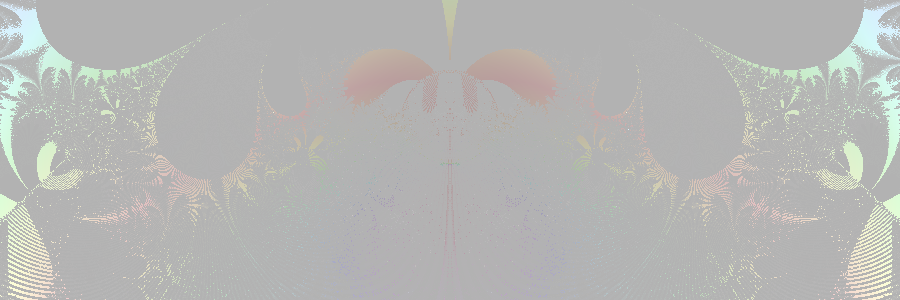

In [76]:
H = ncp.range_norm(Zd - Zr, lo=0.0, hi=1.0)
S = ncp.range_norm(ETn, lo=0.0, hi=0.15)
V = ncp.range_norm(ETn * Zd, lo=0.7, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

In [41]:
#                                        smaller -> view individual escape time sets -- "iconic" 
par_set = {'n_rows': 200, 'n_cols': 600}
par_set['center_point'] = 0.7 + 0.0*1j
par_set['theta'] = np.pi / 2
par_set['zoom'] = 0.31

par_set['it_max'] = 64
par_set['max_d'] = 120 / par_set['zoom']
par_set['dir_path'] = os.getcwd()

p = [131.736080357263, 7.410291823809, 12.902639951370, 2.223646982174, 0.972974554764];

list_tuple = [(RadHak, (p))]

t0 = time.time()
ET_sm, Z_sm, Z0_sm = ig.get_primitives(list_tuple, par_set)
print(time.time() - t0, '\t total time')

#                  escape time graphical norm
t0 = time.time()
Zd_sm, Zr_sm, ETn_sm = ncp.etg_norm(Z0_sm, Z_sm, ET_sm)
print('converstion time =\t', time.time() - t0)

2.730634927749634 	 total time
converstion time =	 0.2548949718475342


coloring time =	 0.6727309226989746


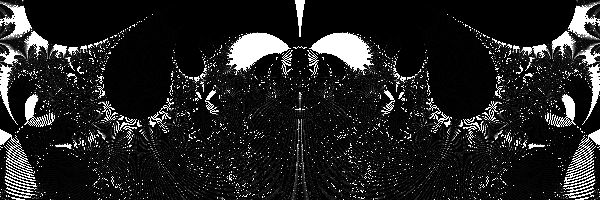

In [42]:
#                  Escape Time: darker escaped sooner
t0 = time.time()
ETd = ncp.mat_to_gray(ETn_sm)
print('coloring time =\t',time.time() - t0)
display(ETd)

coloring time =	 0.6870729923248291


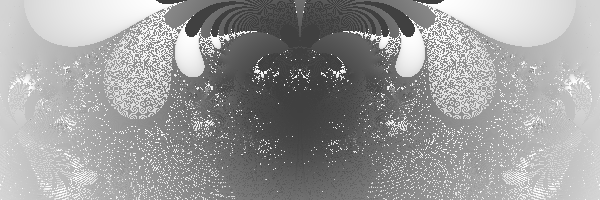

In [43]:
#                  Distance at Escape Time: lighter traveled further
t0 = time.time()
D = ncp.mat_to_gray(Zd_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(D)

coloring time =	 0.651465892791748


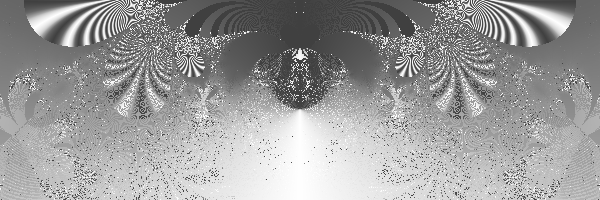

In [44]:
#                  Rotation at Escape Time: lighter rotated more
t0 = time.time()
R = ncp.mat_to_gray(Zr_sm, max_v=255, min_v=64)
print('coloring time =\t',time.time() - t0)
display(R)

coloring time:	 1.4658780097961426


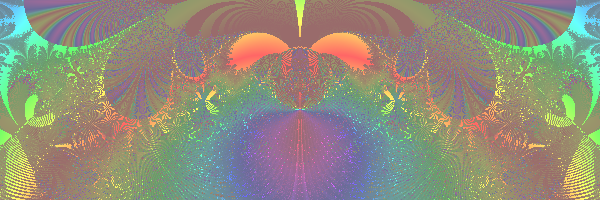

In [54]:
H = ncp.range_norm(Zd_sm - Zr_sm, lo=0.0, hi=1.0)
S = ncp.range_norm(ETn_sm, lo=0.3, hi=0.6)
V = ncp.range_norm(ETn_sm, lo=0.6, hi=1.0)
t0 = time.time()
Ihsv = ncp.rgb_2_hsv_mat(H, S, V)
print('coloring time:\t',time.time() - t0)
display(Ihsv)

ET =	 2


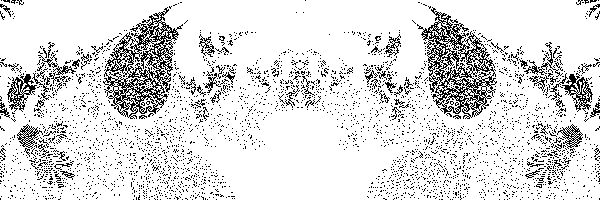

ET =	 3


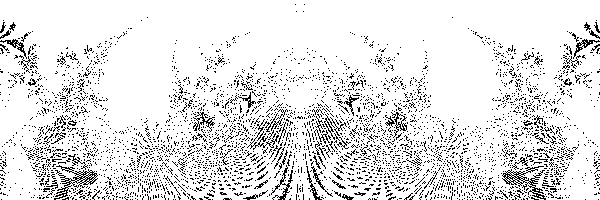

ET =	 4


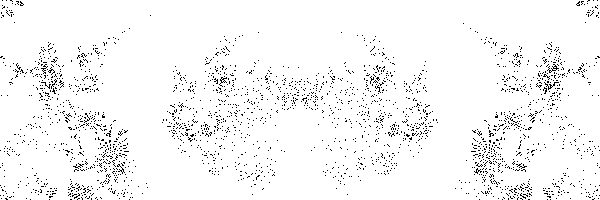

ET =	 5


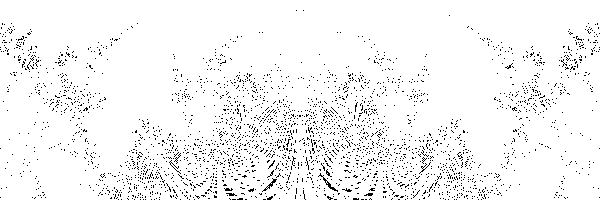

ET =	 6


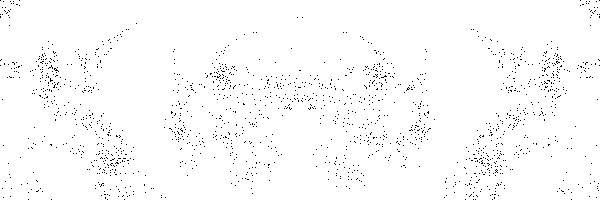

ET =	 7


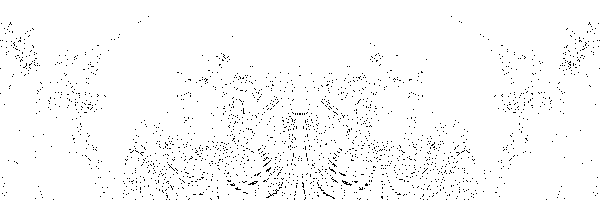

ET >	 8


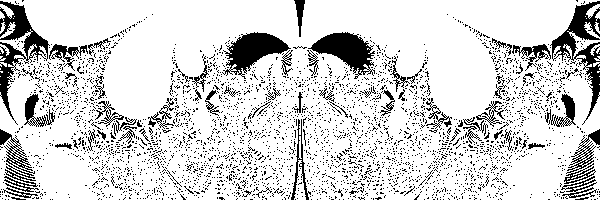

In [68]:
#                                        view smaller - individual escape time starting points
lo_ET = 2
hi_ET = lo_ET + 6
for t in range(lo_ET, hi_ET):
    print('ET =\t',t)
    I = np.ones(ET_sm.shape)
    I[ET_sm == t] = 0
    display(ncp.mat_to_gray(I))
I = np.ones(ET_sm.shape)
I[ET_sm > hi_ET] = 0
print('ET >\t',hi_ET)
display(ncp.mat_to_gray(I))

In [69]:
#                                        view smaller - individual escape time frequency
for k in range(0,int(ET_sm.max())):
    print(k, (ET_sm == k).sum())
print('\nHow many never escaped:\n>',(ET_sm > k).sum())

0 0
1 53979
2 16186
3 13503
4 4464
5 5185
6 2017
7 2751
8 1219
9 1506
10 701
11 953
12 465
13 646
14 362
15 424
16 263
17 330
18 185
19 242
20 150
21 156
22 108
23 153
24 79
25 107
26 69
27 93
28 78
29 90
30 66
31 72
32 59
33 59
34 56
35 67
36 48
37 68
38 47
39 51
40 46
41 38
42 39
43 59
44 45
45 59
46 25
47 45
48 33
49 29
50 18
51 18
52 10
53 15
54 10
55 10
56 7
57 6
58 2
59 3
60 9
61 5
62 5
63 5
64 6

How many never escaped:
> 12396


In [70]:
#                           get the list of unescaped starting points and look for orbit points
Z_overs = Z0[ET_sm == ET_sm.max()]

v1 = Z_overs[0]
d = '%0.2f'%(np.abs(v1))
theta = '%0.1f'%(180*np.arctan2(np.imag(v1), np.real(v1))/np.pi)
print('Unescaped Vector:\n\tV = ', d, theta, 'degrees\n')

print('%9d'%Z_overs.size, 'total unescaped points\n')
print('%9s'%('points'), 'near V', '      (plane units)')
for denom0 in range(1,12):
    neighbor_distance = np.abs(v1) * 1/denom0
    v1_list = Z_overs[np.abs(Z_overs-v1) < neighbor_distance]
    print('%9d'%len(v1_list), 'within V/%2d  (%0.3f)'%(denom0, neighbor_distance))

Unescaped Vector:
	V =  9.54 -105.3 degrees

    12396 total unescaped points

   points near V       (plane units)
     8704 within V/ 1  (9.544)
     4417 within V/ 2  (4.772)
     2524 within V/ 3  (3.181)
     1887 within V/ 4  (2.386)
     1405 within V/ 5  (1.909)
     1137 within V/ 6  (1.591)
      953 within V/ 7  (1.363)
      790 within V/ 8  (1.193)
      696 within V/ 9  (1.060)
      617 within V/10  (0.954)
      551 within V/11  (0.868)
